<a href="https://colab.research.google.com/github/Davron030901/PyTorch/blob/main/pytorch_gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Gradient

In [ ]:
import torch
import numpy as pd

In [ ]:
x=torch.tensor([3.0],dtype=torch.float32,requires_grad=True)

In [ ]:
y=x**2+4

In [ ]:
## x^2| 2*x |

In [ ]:
y.backward()

In [ ]:
print('Gradient:x',x.grad)

Gradient:x tensor([6.])


In [ ]:
x=torch.tensor(3.0)
y=torch.tensor(7.0)

In [ ]:
x.requires_grad_(True)
y.requires_grad_(True)

tensor(7., requires_grad=True)

In [ ]:
z=x**y

In [ ]:
z.backward()

In [ ]:
x.grad

tensor(5103.)

In [ ]:
print('Gradient:x',x.grad)
print('Gradient:y',y.grad)

Gradient:x tensor(5103.)
Gradient:y tensor(2402.6650)


y=mx+b

In [ ]:
m=torch.tensor(2.0,dtype=torch.float32,requires_grad=True)
x=torch.tensor(4.0,dtype=torch.float32,requires_grad=True)
b=torch.tensor(7.0,dtype=torch.float32,requires_grad=True)

In [ ]:
x=x.detach()

In [ ]:
y=m*x+b

In [ ]:
y.backward()

In [ ]:
print('Gradient:m',m.grad)
print('Gradient:x',x.grad)
print('Gradient:b',b.grad)

Gradient:m tensor(4.)
Gradient:x None
Gradient:b tensor(1.)


##Deep Dive into Softmax and Cross Entropy

In [ ]:
import torch
import torch.nn as nn
import numpy as np

In [ ]:
logits=torch.tensor([[2.5,0.2,0.6],[0.3,2.7,0.3],[0.1,0.2,1.6]])
target=torch.tensor([0,1,2])

In [ ]:
softmax_prob=torch.softmax(logits,dim=1)

In [ ]:
print(softmax_prob)

tensor([[0.8001, 0.0802, 0.1197],
        [0.0768, 0.8464, 0.0768],
        [0.1518, 0.1678, 0.6804]])


In [ ]:
manual_loss=torch.mean(-torch.log(softmax_prob.gather(1,target.view(-1,1))))

In [ ]:
print(manual_loss.item())

0.25827091932296753


In [ ]:
criterion=nn.CrossEntropyLoss()

In [ ]:
loss=criterion(logits,target)

In [ ]:
print(loss.item())

0.25827088952064514


In [ ]:
logits2=torch.randn(5,10)
target2=torch.LongTensor([1,7,2,4,3])

In [ ]:
logits2

tensor([[ 1.0995,  0.2472,  0.3367, -0.6793,  0.4428, -0.0999, -0.3998, -1.2092,
         -0.8555,  1.1314],
        [ 0.7487, -1.4570, -0.7373, -1.4749,  1.5550, -1.0907, -1.6090, -0.5580,
         -0.0853,  0.1663],
        [ 1.1454, -0.4876,  0.4178, -0.5277,  0.0148,  0.9570,  0.2851,  0.4052,
         -0.3757,  1.3458],
        [-0.0495,  1.0317, -0.0945, -1.7425, -0.1424,  0.3709,  0.6013,  0.3604,
         -0.5474,  0.9631],
        [ 0.1492,  1.8303, -0.6721,  0.1993,  1.2207,  0.5484,  1.0994,  1.7813,
          1.2187,  0.2235]])

In [ ]:
target2

tensor([1, 7, 2, 4, 3])

In [ ]:
criterion2=nn.CrossEntropyLoss()

In [ ]:
loss2=criterion2(logits2,target2)

In [ ]:
print(loss2.item())

2.7141804695129395


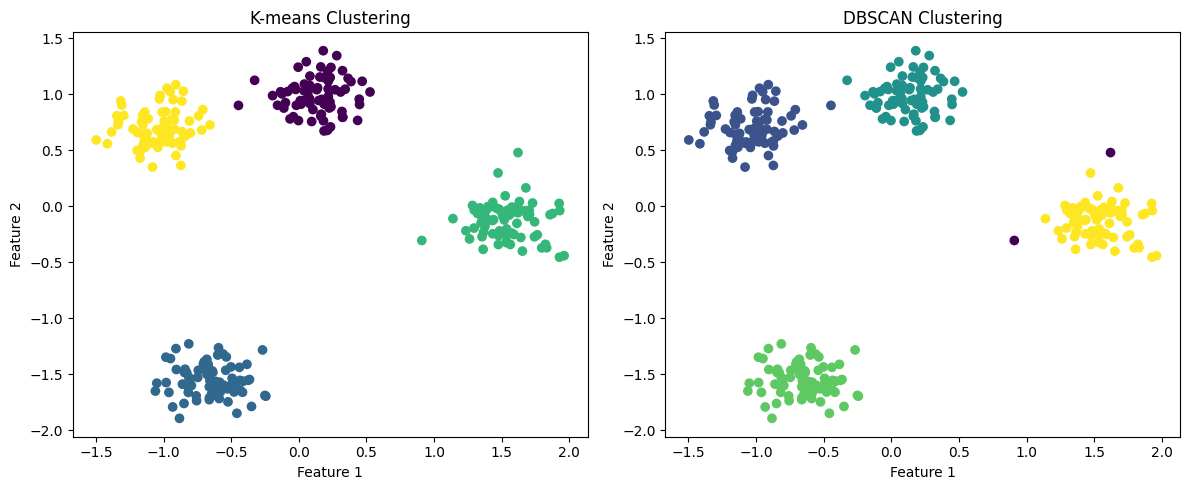

K-means klasterlar soni: 4
DBSCAN klasterlar soni: 4
DBSCAN tomonidan noise sifatida belgilangan nuqtalar: 2


In [ ]:
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Test ma'lumotlarini yaratish
n_samples = 300
X, y = make_blobs(n_samples=n_samples, centers=4, cluster_std=1.0, random_state=42)
X = StandardScaler().fit_transform(X)

# K-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_labels = dbscan.fit_predict(X)

# Natijalarni vizualizatsiya qilish
plt.figure(figsize=(12, 5))

# K-means natijasi
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# DBSCAN natijasi
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Klasterlar haqida ma'lumot
print("K-means klasterlar soni:", len(np.unique(kmeans_labels)))
print("DBSCAN klasterlar soni:", len(np.unique(dbscan_labels[dbscan_labels >= 0])))
print("DBSCAN tomonidan noise sifatida belgilangan nuqtalar:", np.sum(dbscan_labels == -1))

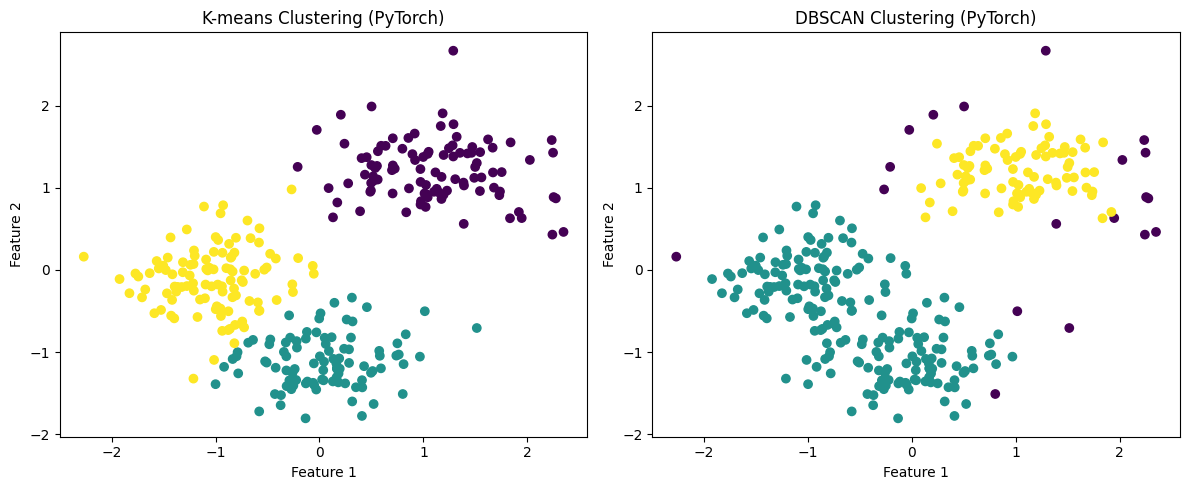

K-means klasterlar soni: 3
DBSCAN klasterlar soni: 2
DBSCAN noise nuqtalar soni: 19


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# K-means implementatsiyasi
class KMeansTorch:
    def __init__(self, n_clusters=4, max_iters=100):
        self.n_clusters = n_clusters
        self.max_iters = max_iters

    def fit(self, X):
        # Ma'lumotlarni PyTorch tensoriga o'tkazish
        if not torch.is_tensor(X):
            X = torch.from_numpy(X).float()

        n_samples = X.shape[0]

        # Tasodifiy markazlarni tanlash
        idx = torch.randperm(n_samples)[:self.n_clusters]
        self.centroids = X[idx].clone()

        for _ in range(self.max_iters):
            old_centroids = self.centroids.clone()

            # Har bir nuqtaning eng yaqin markazini topish
            distances = torch.cdist(X, self.centroids)
            self.labels = torch.argmin(distances, dim=1)

            # Markazlarni yangilash
            for k in range(self.n_clusters):
                mask = self.labels == k
                if torch.sum(mask) > 0:
                    self.centroids[k] = torch.mean(X[mask], dim=0)

            # Convergence tekshirish
            if torch.all(old_centroids == self.centroids):
                break

        return self.labels

# DBSCAN implementatsiyasi
class DBSCANTorch:
    def __init__(self, eps=0.3, min_samples=5):
        self.eps = eps
        self.min_samples = min_samples

    def _get_neighbors(self, X, point_idx):
        distances = torch.norm(X - X[point_idx], dim=1)
        return torch.where(distances <= self.eps)[0]

    def fit(self, X):
        if not torch.is_tensor(X):
            X = torch.from_numpy(X).float()

        n_samples = X.shape[0]
        labels = torch.full((n_samples,), -1)
        cluster_label = 0

        for point_idx in range(n_samples):
            if labels[point_idx] != -1:
                continue

            neighbors = self._get_neighbors(X, point_idx)

            if len(neighbors) < self.min_samples:
                labels[point_idx] = -1  # Noise point
                continue

            # Yangi klaster boshlash
            labels[point_idx] = cluster_label
            stack = neighbors.tolist()

            while stack:
                current_point = stack.pop()
                if labels[current_point] == -1:
                    labels[current_point] = cluster_label

                    current_neighbors = self._get_neighbors(X, current_point)
                    if len(current_neighbors) >= self.min_samples:
                        stack.extend([n.item() for n in current_neighbors if labels[n] == -1])

            cluster_label += 1

        self.labels = labels
        return self.labels

# Test qilish
def generate_sample_data(n_samples=300):
    np.random.seed(42)
    X = np.concatenate([
        np.random.normal(0, 1, (n_samples//3, 2)),
        np.random.normal(4, 1.2, (n_samples//3, 2)),
        np.random.normal([2, -3], [1, 1], (n_samples//3, 2))
    ])
    return StandardScaler().fit_transform(X)

# Ma'lumotlarni tayyorlash
X = generate_sample_data()
X_tensor = torch.from_numpy(X).float()

# K-means
kmeans = KMeansTorch(n_clusters=3)
kmeans_labels = kmeans.fit(X_tensor)

# DBSCAN
dbscan = DBSCANTorch(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit(X_tensor)

# Natijalarni vizualizatsiya qilish
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels.numpy(), cmap='viridis')
plt.title('K-means Clustering (PyTorch)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels.numpy(), cmap='viridis')
plt.title('DBSCAN Clustering (PyTorch)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Natijalar haqida ma'lumot
print("K-means klasterlar soni:", len(torch.unique(kmeans_labels)))
print("DBSCAN klasterlar soni:", len(torch.unique(dbscan_labels[dbscan_labels >= 0])))
print("DBSCAN noise nuqtalar soni:", torch.sum(dbscan_labels == -1).item())